In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM, Embedding, Dense

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df['text'] = df['text'].str.lower()

In [5]:

from string import punctuation
df['text'] = df['text'].str.translate(str.maketrans('','', punctuation))

In [6]:
split_fraction = 0.8

# train data slicing
train_size = int(len(df) * split_fraction)
train_data = df.iloc[: train_size, :]

test_data = df.iloc[train_size: , :]

In [7]:
train_dataX = train_data['text']
test_dataX = test_data['text']

In [8]:
tokenizer = Tokenizer(num_words = 5000,
                      oov_token='<OOV>',
                      char_level=False)

# fitting on text
tokenizer.fit_on_texts(train_dataX)

In [9]:
# train sequences
sequences = tokenizer.texts_to_sequences(train_dataX)

In [10]:
# test sequences
seq = tokenizer.texts_to_sequences(test_dataX)

In [11]:
# padding the data
train_padding = pad_sequences(sequences=sequences, maxlen = 200,
                              truncating = 'post')

# test data padding
test_padding = pad_sequences(sequences=seq, maxlen = 200,
                              truncating = 'post')

In [27]:
# labels

['tech',
 'business',
 'sport',
 'sport',
 'entertainment',
 'politics',
 'politics',
 'sport',
 'sport',
 'entertainment',
 'entertainment',
 'business',
 'business',
 'politics',
 'sport',
 'business',
 'politics',
 'sport',
 'business',
 'tech',
 'tech',
 'tech',
 'sport',
 'sport',
 'tech',
 'sport',
 'entertainment',
 'tech',
 'politics',
 'entertainment',
 'politics',
 'tech',
 'entertainment',
 'entertainment',
 'business',
 'politics',
 'tech',
 'entertainment',
 'politics',
 'business',
 'politics',
 'sport',
 'business',
 'sport',
 'tech',
 'entertainment',
 'politics',
 'politics',
 'politics',
 'business',
 'sport',
 'politics',
 'business',
 'business',
 'sport',
 'politics',
 'business',
 'sport',
 'sport',
 'business',
 'business',
 'sport',
 'business',
 'sport',
 'business',
 'tech',
 'business',
 'entertainment',
 'tech',
 'business',
 'politics',
 'business',
 'politics',
 'sport',
 'business',
 'tech',
 'business',
 'sport',
 'sport',
 'business',
 'business',
 'spo

In [28]:
train_labels = labels[0: train_size]
test_labels = labels[train_size:]

In [29]:
print(set(labels))

{'politics', 'sport', 'entertainment', 'business', 'tech'}


In [30]:

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
test_labels_seq = np.array(label_tokenizer.texts_to_sequences(test_labels))

In [33]:
label_tokenizer.word_index

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

In [34]:
model = Sequential()

model.add(Embedding(5000, 300, input_length = 200))
model.add(LSTM(128))
model.add(Dense(6, activation = 'softmax',))

In [35]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],)

In [36]:
history = model.fit(train_padding, training_label_seq, 
                    epochs=10, validation_data=(test_padding, test_labels_seq))


Epoch 1/10
56/56 [==============================] - 17s 278ms/step - loss: 1.6272 - accuracy: 0.2640 - val_loss: 1.5075 - val_accuracy: 0.3640
Epoch 2/10
56/56 [==============================] - 15s 270ms/step - loss: 1.1894 - accuracy: 0.5478 - val_loss: 0.8949 - val_accuracy: 0.7034
Epoch 3/10
56/56 [==============================] - 15s 269ms/step - loss: 0.6471 - accuracy: 0.7860 - val_loss: 0.6970 - val_accuracy: 0.7528
Epoch 4/10
56/56 [==============================] - 15s 265ms/step - loss: 0.2656 - accuracy: 0.9315 - val_loss: 0.6768 - val_accuracy: 0.7865
Epoch 5/10
56/56 [==============================] - 15s 272ms/step - loss: 0.1342 - accuracy: 0.9663 - val_loss: 0.5824 - val_accuracy: 0.8157
Epoch 6/10
56/56 [==============================] - 16s 278ms/step - loss: 0.0461 - accuracy: 0.9904 - val_loss: 0.4906 - val_accuracy: 0.8539
Epoch 7/10
56/56 [==============================] - 15s 269ms/step - loss: 0.0211 - accuracy: 0.9961 - val_loss: 0.5080 - val_accuracy: 0.8584

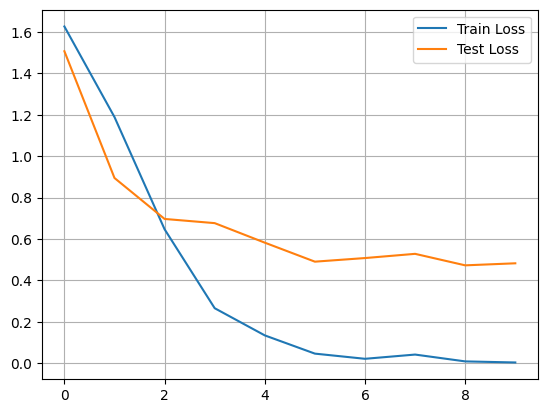

In [39]:
plt.plot(history.history['loss'], label = 'Train Loss');
plt.plot(history.history['val_loss'], label = 'Test Loss');
plt.grid();
plt.legend();

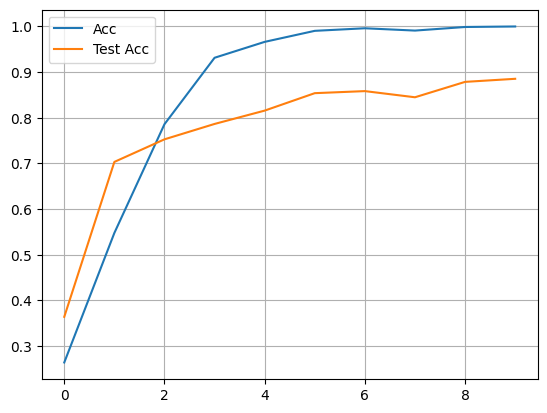

In [40]:
plt.plot(history.history['accuracy'], label = 'Acc');
plt.plot(history.history['val_accuracy'], label = 'Test Acc');
plt.grid();
plt.legend();

In [41]:
# predictions
txt = ["blair prepares to name poll date tony blair is likely to name 5 may as election day when parliament returns from its easter break  the bbc s political editor has learned.  andrew marr says mr blair will ask the queen on 4 or 5 april to dissolve parliament at the end of that week. mr blair has so far resisted calls for him to name the day but all parties have stepped up campaigning recently. downing street would not be drawn on the claim  saying election timing was a matter for the prime minister.  a number 10 spokeswoman would only say:  he will announce an election when he wants to announce an election.  the move will signal a frantic week at westminster as the government is likely to try to get key legislation through parliament. the government needs its finance bill  covering the budget plans  to be passed before the commons closes for business at the end of the session on 7 april.  but it will also seek to push through its serious and organised crime bill and id cards bill. mr marr said on wednesday s today programme:  there s almost nobody at a senior level inside the government or in parliament itself who doesn t expect the election to be called on 4 or 5 april.  as soon as the commons is back after the short easter recess  tony blair whips up to the palace  asks the queen to dissolve parliament ... and we re going.  the labour government officially has until june 2006 to hold general election  but in recent years governments have favoured four-year terms."]

In [43]:
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=200)
pred = model.predict(padded)

1/1 [==============================] - 1s 518ms/step


In [44]:
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment', 'unknown'] 
print(pred)
print(np.argmax(pred))
print(labels[np.argmax(pred)-1])

[[6.4566801e-04 4.0430021e-03 1.2096553e-02 9.7608745e-01 2.0542878e-03
  5.0730174e-03]]
3
politics


In [47]:
print(pred)
print(np.argmax(pred))
print(labels[np.argmax(pred)-1])

[[6.4566801e-04 4.0430021e-03 1.2096553e-02 9.7608745e-01 2.0542878e-03
  5.0730174e-03]]
3
politics
